In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from source.mcmc import MCMC

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

    # The for loop is to allow for the option of plotting multiple chains on the same chart
    # (It just kinda looks cool)
print(f"Starting Markov Chain")
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
g_cov_test = np.diag([.01, .01, .1, .01])
markov_chain = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=g_cov_test)

markov_chain.make_chain(1000)

print(markov_chain.chain)

s1 tuple (1.0, 2.0, 3.0, 4.0)
s1[0] 1.0
str s1 (Omega_m: 1.0, Omega_L: 2.0, H0: 3.0, M: 4.0)
repr s1 [<State Omega_m: 1.0, Omega_L: 2.0, H0: 3.0, M: 4.0>]
s1 values 1.0 2.0 3.0 4.0
s2 values 5.0 6.0 7.0 8.0
s3 0 6.0
add two lists (Omega_m: 6.0, Omega_L: 8.0, H0: 10.0, M: 12.0)
s1*4 (Omega_m: 4.0, Omega_L: 8.0, H0: 12.0, M: 16.0)
Starting Markov Chain
[[  0.09906314   0.73607842  67.01329495 -20.24506508]
 [  0.21153713   0.91408784  66.95596971 -20.2243505 ]
 [  0.14259891   0.8882618   67.04617309 -20.28692669]
 ...
 [  0.36661734   0.60787088  66.54904388 -19.57199824]
 [  0.21656851   0.56814724  66.3531466  -19.47734278]
 [  0.22632275   0.63163974  66.2971334  -19.48176369]]


self <source.mcmc.MCMC object at 0x000001A223BCC700>
type self <class 'source.mcmc.MCMC'>


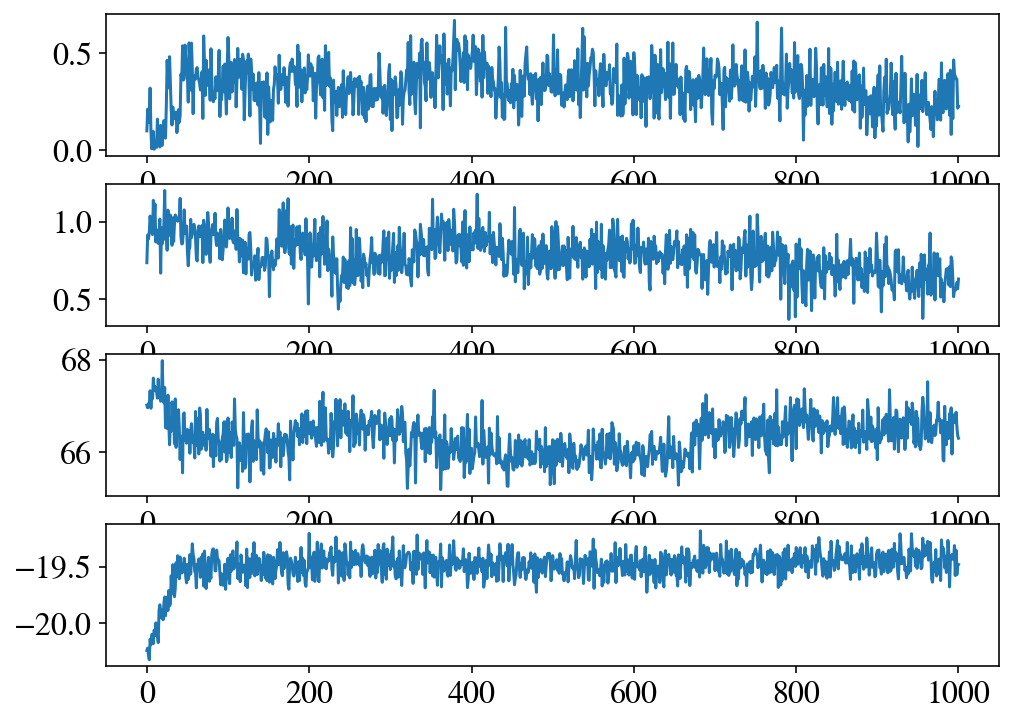

In [2]:
fig, ax = plt.subplots(4,1)

ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

In [3]:
x = markov_chain.chain
print(x, type(x))
print(x.T, type(x.T))
cov = np.cov(markov_chain.chain.T)
alpha= .1
cov*=alpha
print(cov)

[[  0.09906314   0.73607842  67.01329495 -20.24506508]
 [  0.21153713   0.91408784  66.95596971 -20.2243505 ]
 [  0.14259891   0.8882618   67.04617309 -20.28692669]
 ...
 [  0.36661734   0.60787088  66.54904388 -19.57199824]
 [  0.21656851   0.56814724  66.3531466  -19.47734278]
 [  0.22632275   0.63163974  66.2971334  -19.48176369]] <class 'numpy.ndarray'>
[[  0.09906314   0.21153713   0.14259891 ...   0.36661734   0.21656851
    0.22632275]
 [  0.73607842   0.91408784   0.8882618  ...   0.60787088   0.56814724
    0.63163974]
 [ 67.01329495  66.95596971  67.04617309 ...  66.54904388  66.3531466
   66.2971334 ]
 [-20.24506508 -20.2243505  -20.28692669 ... -19.57199824 -19.47734278
  -19.48176369]] <class 'numpy.ndarray'>
[[ 0.00130233  0.00019337 -0.00117995  0.0002811 ]
 [ 0.00019337  0.00174416 -0.0006057  -0.00034959]
 [-0.00117995 -0.0006057   0.01814223 -0.0008761 ]
 [ 0.0002811  -0.00034959 -0.0008761   0.00183416]]


In [4]:
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
markov_chain2 = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=cov)

markov_chain2.make_chain(10000)

self <source.mcmc.MCMC object at 0x000001A223BCC700>
type self <class 'source.mcmc.MCMC'>


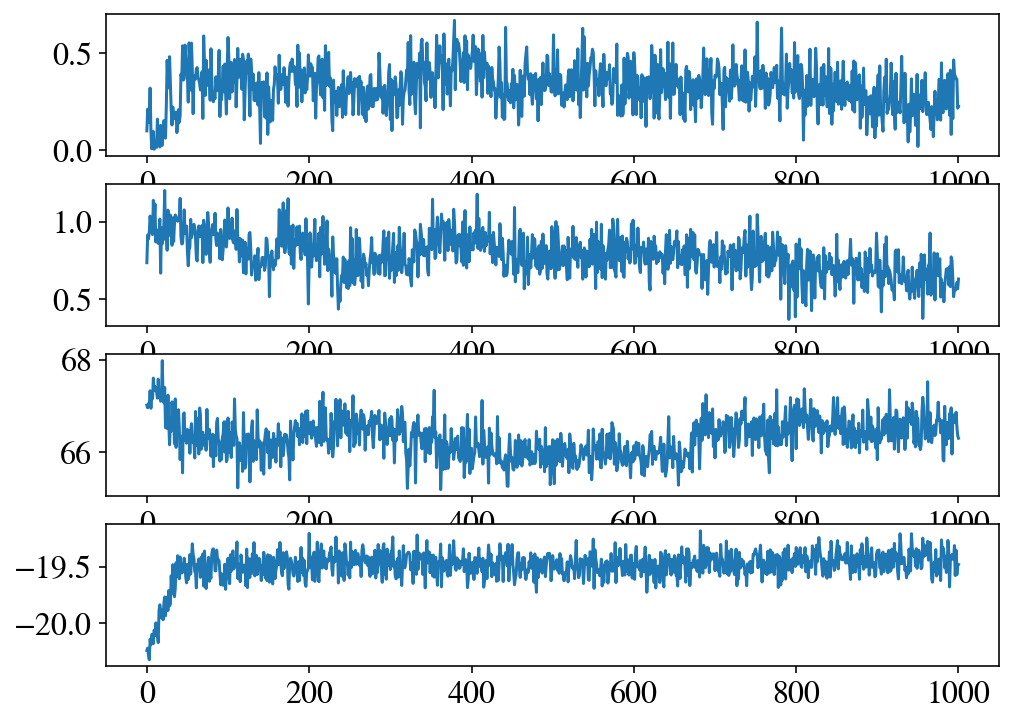

In [7]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

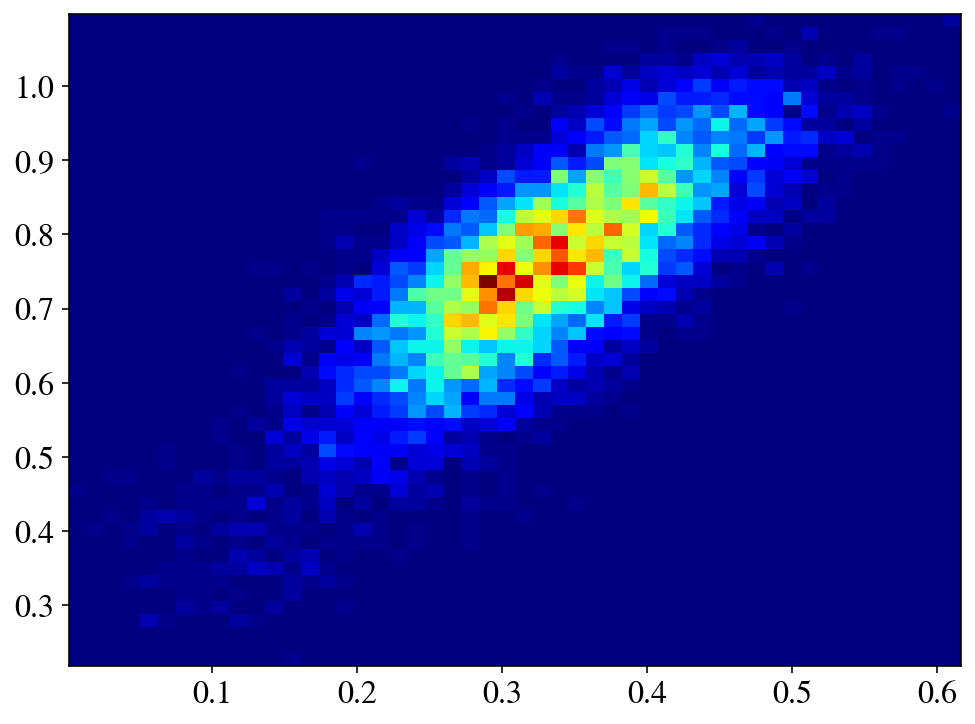

In [6]:
plt.hist2d(markov_chain2.chain[500:,0], markov_chain2.chain[500:,1], bins=(50, 50), cmap=plt.cm.jet)
plt.show()